In [482]:
import pandas as pd
import numpy as np

In [318]:
df = pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [319]:
df = df.rename(columns={"x":"length","y":"width","z":"height"})

# Regressions

## Linear Regression on price with carat

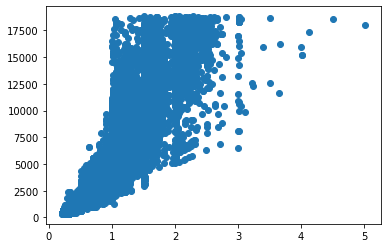

In [320]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df["carat"],df["price"])
plt.show()

In [751]:
X = df[["carat"]].values
Y = df[["price"]].values
    
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0, test_size = 0.25)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

print(model.score(X_test,Y_test))

0.8506009410929622


With the repeated K-Fold Cross Validation we can get scores with less variance:

In [752]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

scores = cross_val_score(LinearRegression(),X,Y, cv= RepeatedKFold(n_repeats = 10))
print(np.mean(scores))

0.849282678479684


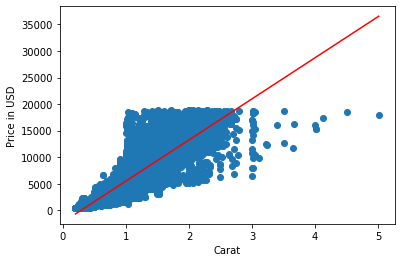

In [753]:
min_x = min(df["carat"])
max_x = max(df["carat"])

plt.scatter(df["carat"],df["price"])
plt.plot([min_x, max_x], model.predict([[min_x],[max_x]]), color="red")
plt.xlabel("Carat")
plt.ylabel("Price in USD")
plt.show()

As we can see, the model seems acceptable for diamonds less than 3 carats. Above 3 carats we can observe a huge variance between the estimated and real prices.

## Linear Regression on price with Length, Width, Height

In [754]:
X = df[["length","width","height"]].values
Y = df["price"].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0, test_size = 0.25)

model.fit(X_train,Y_train)
print(model.score(X_test,Y_test))

0.7834062179737854


In [755]:
scores = cross_val_score(LinearRegression(),X,Y, cv= RepeatedKFold(n_repeats = 10))
print(np.mean(scores))

0.7761679390741923


Carat is a better estimator then length, width and height

## Polynomial Regression on price with Length, Width, Height

In [756]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)

X_train_adjusted = poly.fit_transform(X_train)
X_test_adjusted = poly.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_adjusted,Y_train)
print(poly_model.score(X_test_adjusted,Y_test))

0.8658475479746959


In [762]:
X = df[["length","width","height"]].values
Y = df[["price"]].values
 
poly = PolynomialFeatures(degree=2, include_bias = False)
poly.fit(X)
 
X_transformed = poly.transform(X)

scores = cross_val_score(LinearRegression(),X_transformed,Y,cv=RepeatedKFold(n_splits=10,n_repeats=3))
print(np.mean(scores))

0.8093445066279183


In this result the polynomial regression on price with the independent variables length, width and height seems to be slightly more accurate than the linear regression with carats as a dependent variable. Nevertheless when trying to use the repeated K-Fold Cross Validation, we get a lower value. The linear regression with carats is more reliable.\
\
Because of the rarity of diamonds > 2-carat we can not rely on the dataset for analyses in the extremely high carat segment.